DETECCIÓN DE OUTLIERS (VALORES EXTREMOS)

✓ Datos cargados correctamente
  - Ventas: 120 registros
  - Detalle ventas: 343 registros
  - Productos: 100 registros
  - Clientes: 100 registros

--------------------------------------------------------------------------------
PREPARACIÓN DE VARIABLES PARA ANÁLISIS
--------------------------------------------------------------------------------

✓ Variables preparadas para análisis de outliers

--------------------------------------------------------------------------------
VARIABLES SELECCIONADAS
--------------------------------------------------------------------------------

Variables a analizar:
  1. Importe de Venta: 342 observaciones
  2. Cantidad de Productos: 342 observaciones
  3. Precio Unitario: 342 observaciones
  4. Total Gastado por Cliente: 67 observaciones
  5. Número de Compras por Cliente: 67 observaciones

MÉTODO 1: RANGO INTERCUARTÍLICO (IQR)

Este es el método más común y robusto para detectar outliers

Fórmula:
  • Q1 =

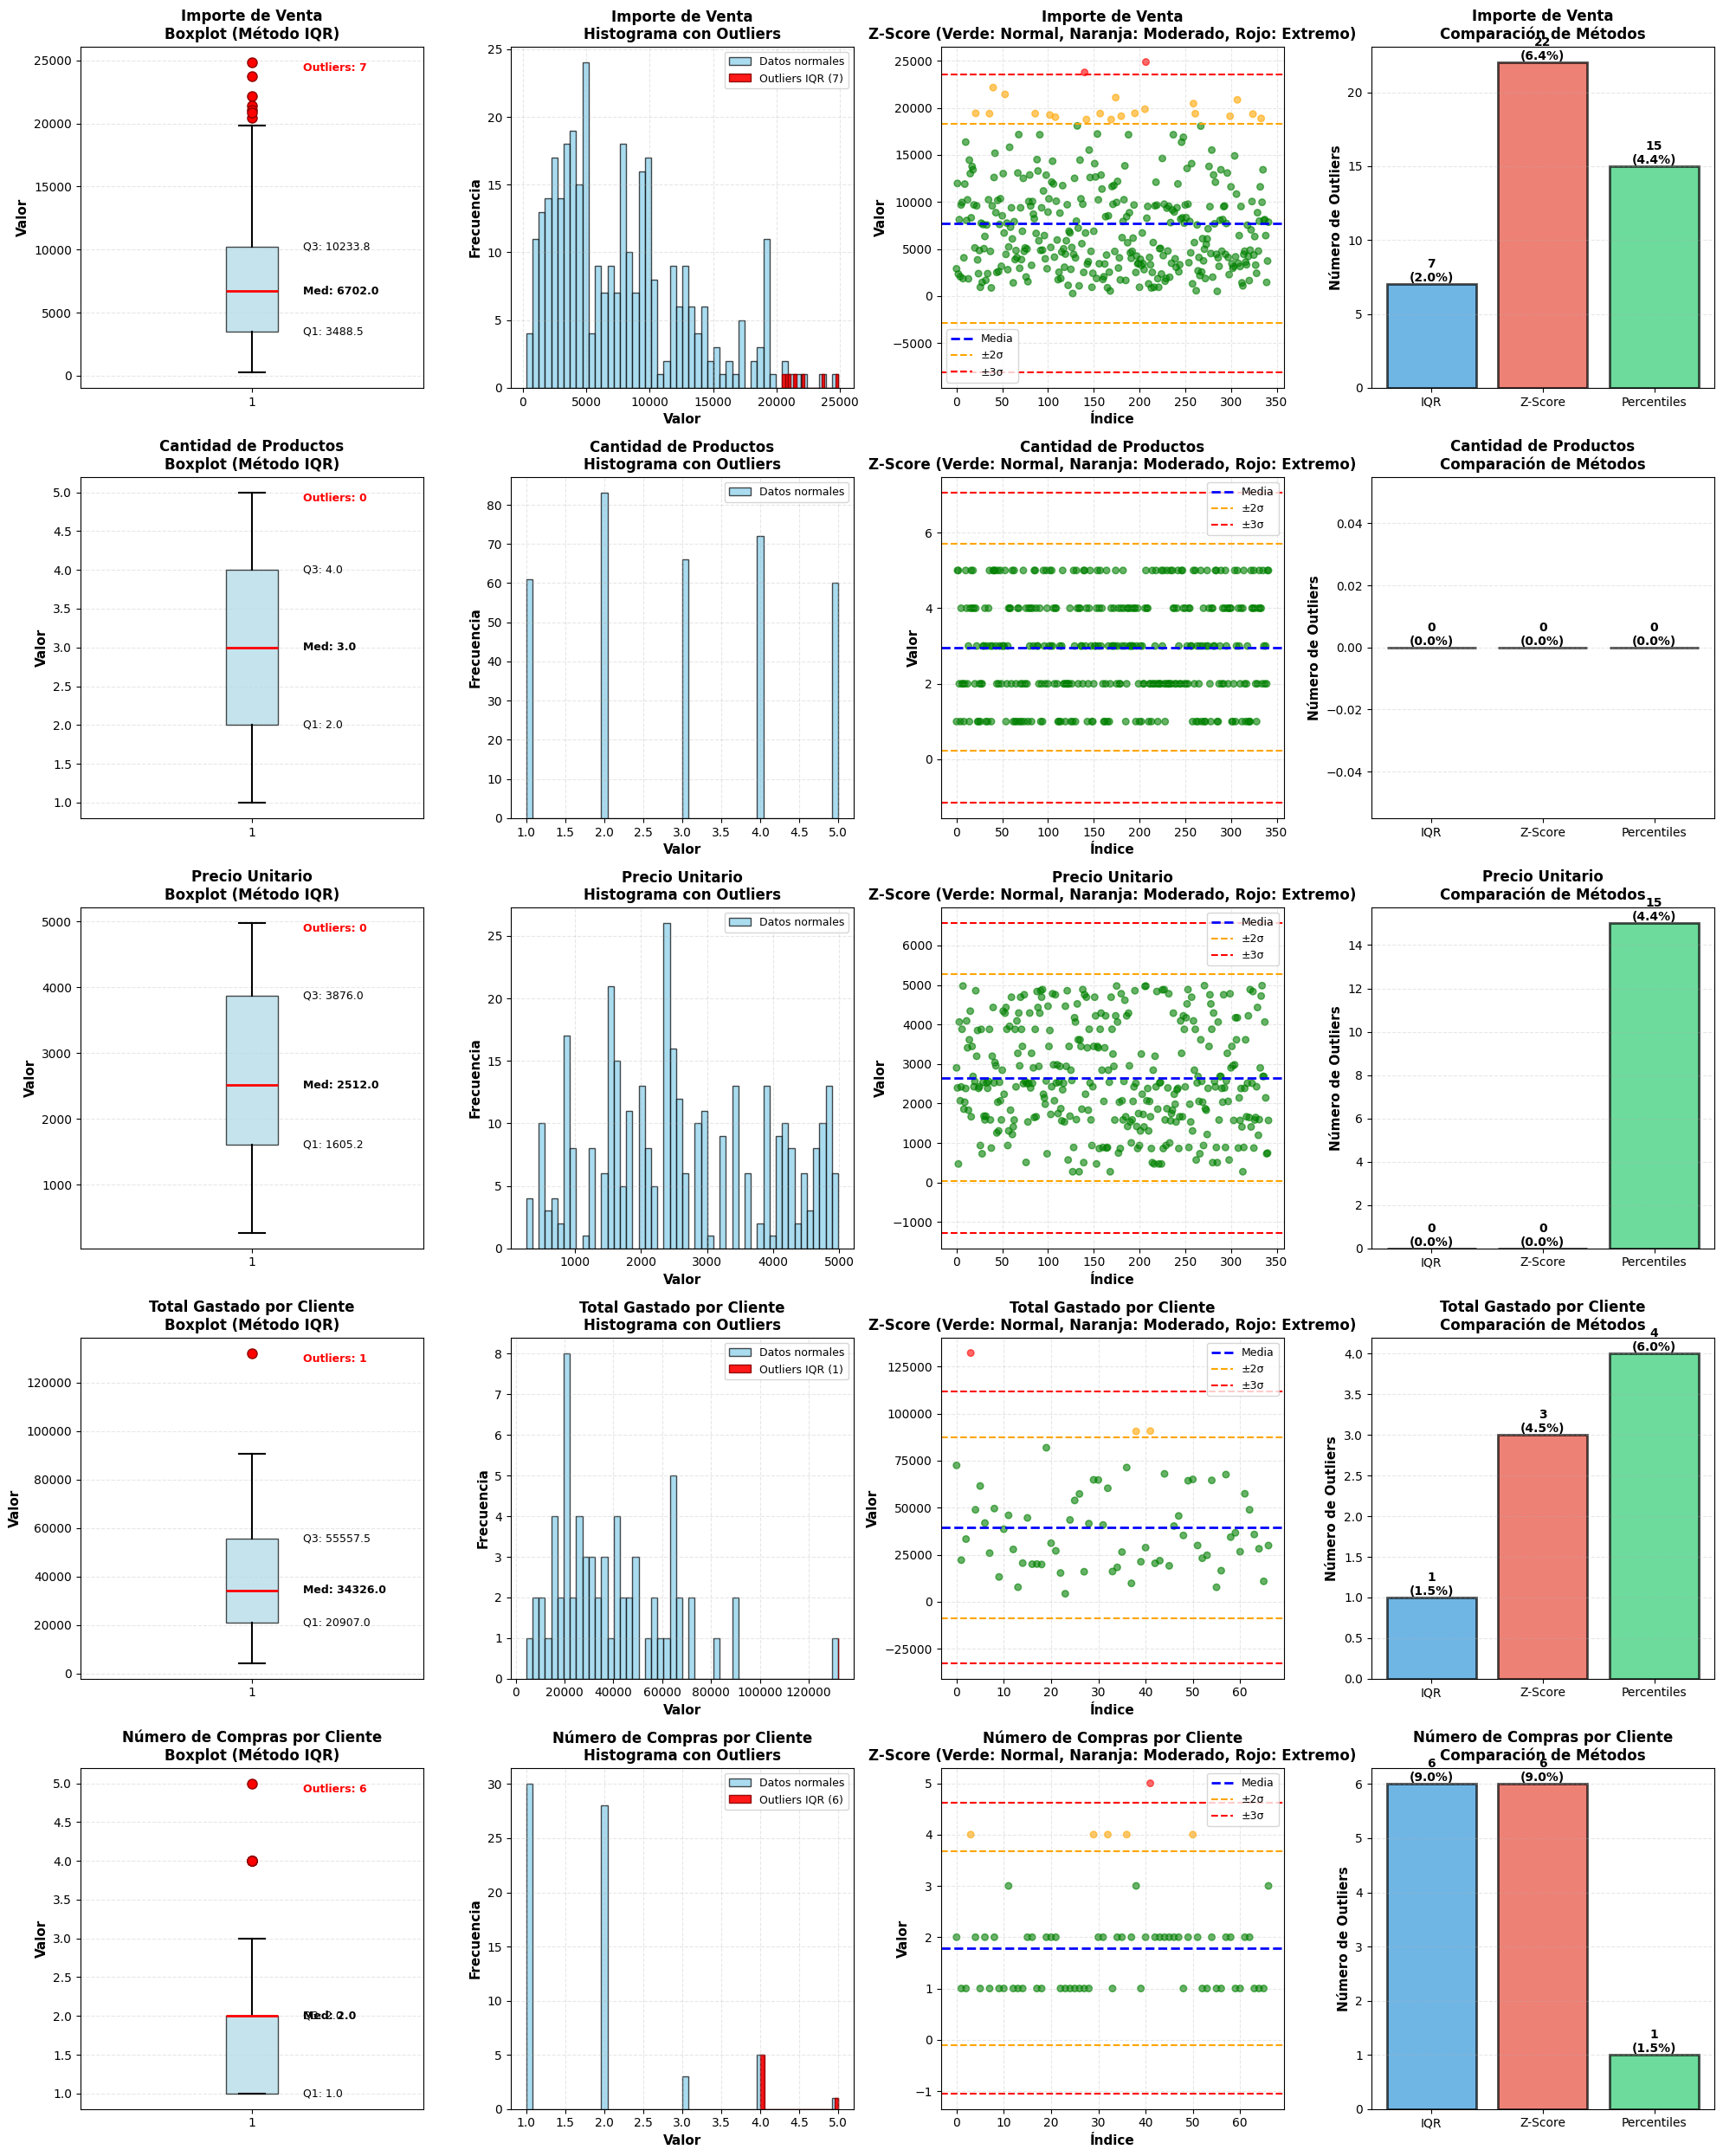


✓ Visualizaciones generadas exitosamente

ANÁLISIS DE IMPACTO DE OUTLIERS EN ESTADÍSTICAS

📊 IMPORTE DE VENTA

📈 CON OUTLIERS:
  Media:              7,730.00
  Mediana:            6,702.00
  Desviación Estándar: 5,273.26

📉 SIN OUTLIERS:
  Media:              7,430.05
  Mediana:            6,426.00
  Desviación Estándar: 4,892.10

📊 IMPACTO:
  Diferencia en Media:     299.96 (3.88%)
  Diferencia en Mediana:   276.00 (4.12%)
  Diferencia en Desv.Std:  381.15 (7.23%)

💡 INTERPRETACIÓN:
  ✅ Los outliers tienen POCO IMPACTO en la media (3.88%)
  → No es necesario eliminarlos para análisis general

📊 CANTIDAD DE PRODUCTOS

📈 CON OUTLIERS:
  Media:              2.96
  Mediana:            3.00
  Desviación Estándar: 1.37

📉 SIN OUTLIERS:
  Media:              2.96
  Mediana:            3.00
  Desviación Estándar: 1.37

📊 IMPACTO:
  Diferencia en Media:     0.00 (0.00%)
  Diferencia en Mediana:   0.00 (0.00%)
  Diferencia en Desv.Std:  0.00 (0.00%)

💡 INTERPRETACIÓN:
  ✅ Los outliers tienen P

In [2]:
# ============================================================================
# DETECCIÓN DE OUTLIERS (VALORES EXTREMOS)
# ============================================================================
# Este análisis identifica valores atípicos que pueden afectar los resultados
# y decisiones de negocio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# %% CARGA DE DATOS
print("="*80)
print("DETECCIÓN DE OUTLIERS (VALORES EXTREMOS)")
print("="*80)

# Definir la ruta donde están los archivos Excel
ruta = r'C:\Users\PROBOOK\OneDrive\Desktop\Demo\Datos'

# Cargar los archivos necesarios
detalle_ventas = pd.read_excel(f'{ruta}\\Detalle_ventas.xlsx')
productos = pd.read_excel(f'{ruta}\\Productos.xlsx')
ventas = pd.read_excel(f'{ruta}\\Ventas.xlsx')
clientes = pd.read_excel(f'{ruta}\\Clientes.xlsx')

print(f"\n✓ Datos cargados correctamente")
print(f"  - Ventas: {len(ventas)} registros")
print(f"  - Detalle ventas: {len(detalle_ventas)} registros")
print(f"  - Productos: {len(productos)} registros")
print(f"  - Clientes: {len(clientes)} registros")

# %% PREPARACIÓN DE DATOS
print("\n" + "-"*80)
print("PREPARACIÓN DE VARIABLES PARA ANÁLISIS")
print("-"*80)

# Convertir fecha a datetime
ventas['fecha'] = pd.to_datetime(ventas['fecha'])

# Unir ventas con detalle para análisis completo
ventas_detalle = ventas.merge(
    detalle_ventas.groupby('id_venta').agg({
        'importe': 'sum',
        'cantidad': 'sum'
    }).reset_index(),
    on='id_venta',
    how='left'
)

# Calcular precio promedio (sin infinitos)
ventas_detalle['precio_promedio'] = ventas_detalle['importe'] / ventas_detalle['cantidad']
ventas_detalle['precio_promedio'] = ventas_detalle['precio_promedio'].replace([np.inf, -np.inf], np.nan)

# Calcular total de ventas por cliente
ventas_por_cliente = ventas_detalle.groupby('id_cliente').agg({
    'importe': 'sum',
    'id_venta': 'count'
}).rename(columns={'importe': 'total_gastado', 'id_venta': 'num_compras'}).reset_index()

print(f"\n✓ Variables preparadas para análisis de outliers")

# %% DEFINIR VARIABLES A ANALIZAR
print("\n" + "-"*80)
print("VARIABLES SELECCIONADAS")
print("-"*80)

# Diccionario con las variables numéricas principales y sus datos
variables_dict = {
    'Importe de Venta': detalle_ventas['importe'].dropna(),
    'Cantidad de Productos': detalle_ventas['cantidad'].dropna(),
    'Precio Unitario': detalle_ventas['precio_unitario'].dropna(),
    'Total Gastado por Cliente': ventas_por_cliente['total_gastado'].dropna(),
    'Número de Compras por Cliente': ventas_por_cliente['num_compras'].dropna()
}

print("\nVariables a analizar:")
for i, (nombre, datos) in enumerate(variables_dict.items(), 1):
    print(f"  {i}. {nombre}: {len(datos)} observaciones")

# %% MÉTODO 1: RANGO INTERCUARTÍLICO (IQR)
print("\n" + "="*80)
print("MÉTODO 1: RANGO INTERCUARTÍLICO (IQR)")
print("="*80)
print("\nEste es el método más común y robusto para detectar outliers")
print("\nFórmula:")
print("  • Q1 = Percentil 25")
print("  • Q3 = Percentil 75")
print("  • IQR = Q3 - Q1")
print("  • Límite Inferior = Q1 - 1.5 × IQR")
print("  • Límite Superior = Q3 + 1.5 × IQR")
print("\nValores fuera de estos límites son considerados outliers")
print("="*80)

# Diccionario para almacenar resultados
outliers_iqr = {}

for nombre, datos in variables_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 {nombre.upper()}")
    print('='*80)
    
    # Calcular cuartiles
    Q1 = datos.quantile(0.25)
    Q2 = datos.median()
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers_mask = (datos < limite_inferior) | (datos > limite_superior)
    outliers = datos[outliers_mask]
    outliers_inferiores = datos[datos < limite_inferior]
    outliers_superiores = datos[datos > limite_superior]
    
    # Calcular porcentajes
    porcentaje_outliers = (len(outliers) / len(datos)) * 100
    porcentaje_outliers_inf = (len(outliers_inferiores) / len(datos)) * 100
    porcentaje_outliers_sup = (len(outliers_superiores) / len(datos)) * 100
    
    # Guardar resultados
    outliers_iqr[nombre] = {
        'Q1': Q1,
        'Q2': Q2,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'num_outliers': len(outliers),
        'num_outliers_inf': len(outliers_inferiores),
        'num_outliers_sup': len(outliers_superiores),
        'porcentaje': porcentaje_outliers,
        'outliers': outliers
    }
    
    # Mostrar resultados
    print(f"\n📈 ESTADÍSTICAS:")
    print(f"  Q1 (Percentil 25):     {Q1:,.2f}")
    print(f"  Q2 (Mediana):          {Q2:,.2f}")
    print(f"  Q3 (Percentil 75):     {Q3:,.2f}")
    print(f"  IQR (Rango Intercuartílico): {IQR:,.2f}")
    
    print(f"\n🎯 LÍMITES:")
    print(f"  Límite Inferior:       {limite_inferior:,.2f}")
    print(f"  Límite Superior:       {limite_superior:,.2f}")
    
    print(f"\n🔍 OUTLIERS DETECTADOS:")
    print(f"  Total de outliers:     {len(outliers)} ({porcentaje_outliers:.2f}%)")
    print(f"  Outliers inferiores:   {len(outliers_inferiores)} ({porcentaje_outliers_inf:.2f}%)")
    print(f"  Outliers superiores:   {len(outliers_superiores)} ({porcentaje_outliers_sup:.2f}%)")
    
    if len(outliers) > 0:
        print(f"\n  Valor mínimo outlier:  {outliers.min():,.2f}")
        print(f"  Valor máximo outlier:  {outliers.max():,.2f}")
        print(f"  Media de outliers:     {outliers.mean():,.2f}")
    
    # Interpretación
    print(f"\n💡 INTERPRETACIÓN:")
    if porcentaje_outliers == 0:
        print(f"  ✅ NO se detectaron outliers")
        print(f"  → Los datos están bien distribuidos")
    elif porcentaje_outliers < 5:
        print(f"  ⚠️  Se detectaron POCOS outliers ({porcentaje_outliers:.2f}%)")
        print(f"  → Es normal tener algunos valores extremos")
        print(f"  → Revisar si son errores o casos especiales legítimos")
    elif porcentaje_outliers < 10:
        print(f"  ⚠️  Se detectaron VARIOS outliers ({porcentaje_outliers:.2f}%)")
        print(f"  → Investigar las causas de estos valores extremos")
        print(f"  → Pueden ser errores de captura o casos especiales")
    else:
        print(f"  ❌ Se detectaron MUCHOS outliers ({porcentaje_outliers:.2f}%)")
        print(f"  → Revisar la calidad de los datos")
        print(f"  → Puede haber problemas en la recolección de datos")

# %% MÉTODO 2: Z-SCORE (PUNTUACIÓN ESTÁNDAR)
print("\n" + "="*80)
print("MÉTODO 2: Z-SCORE (PUNTUACIÓN ESTÁNDAR)")
print("="*80)
print("\nEste método identifica valores que están muy alejados de la media")
print("\nFórmula:")
print("  Z-Score = (Valor - Media) / Desviación Estándar")
print("\nCriterio:")
print("  • |Z-Score| > 3: Outlier extremo")
print("  • |Z-Score| > 2: Outlier moderado")
print("  • |Z-Score| ≤ 2: Valor normal")
print("="*80)

# Diccionario para almacenar resultados
outliers_zscore = {}

for nombre, datos in variables_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 {nombre.upper()}")
    print('='*80)
    
    # Calcular Z-Score
    media = datos.mean()
    desv_std = datos.std()
    z_scores = np.abs((datos - media) / desv_std)
    
    # Identificar outliers
    outliers_extremos = datos[z_scores > 3]
    outliers_moderados = datos[(z_scores > 2) & (z_scores <= 3)]
    outliers_totales = datos[z_scores > 2]
    
    # Calcular porcentajes
    porcentaje_extremos = (len(outliers_extremos) / len(datos)) * 100
    porcentaje_moderados = (len(outliers_moderados) / len(datos)) * 100
    porcentaje_totales = (len(outliers_totales) / len(datos)) * 100
    
    # Guardar resultados
    outliers_zscore[nombre] = {
        'media': media,
        'desv_std': desv_std,
        'num_extremos': len(outliers_extremos),
        'num_moderados': len(outliers_moderados),
        'num_totales': len(outliers_totales),
        'porcentaje_extremos': porcentaje_extremos,
        'porcentaje_moderados': porcentaje_moderados,
        'porcentaje_totales': porcentaje_totales,
        'outliers': outliers_totales
    }
    
    # Mostrar resultados
    print(f"\n📈 ESTADÍSTICAS:")
    print(f"  Media:                 {media:,.2f}")
    print(f"  Desviación Estándar:   {desv_std:,.2f}")
    
    print(f"\n🔍 OUTLIERS DETECTADOS:")
    print(f"  Outliers extremos (|Z| > 3):   {len(outliers_extremos)} ({porcentaje_extremos:.2f}%)")
    print(f"  Outliers moderados (|Z| > 2):  {len(outliers_moderados)} ({porcentaje_moderados:.2f}%)")
    print(f"  Total outliers (|Z| > 2):      {len(outliers_totales)} ({porcentaje_totales:.2f}%)")
    
    if len(outliers_totales) > 0:
        print(f"\n  Valor mínimo outlier:  {outliers_totales.min():,.2f}")
        print(f"  Valor máximo outlier:  {outliers_totales.max():,.2f}")
        print(f"  Z-Score máximo:        {z_scores.max():.2f}")
    
    # Interpretación
    print(f"\n💡 INTERPRETACIÓN:")
    if porcentaje_totales == 0:
        print(f"  ✅ NO se detectaron outliers")
        print(f"  → Todos los valores están dentro de 2 desviaciones estándar")
    elif porcentaje_extremos > 0:
        print(f"  ❌ Se detectaron outliers EXTREMOS ({porcentaje_extremos:.2f}%)")
        print(f"  → Valores muy alejados de la media (más de 3 desviaciones)")
        print(f"  → REVISAR URGENTEMENTE estos casos")
    elif porcentaje_moderados > 0:
        print(f"  ⚠️  Se detectaron outliers MODERADOS ({porcentaje_moderados:.2f}%)")
        print(f"  → Valores alejados de la media (2-3 desviaciones)")
        print(f"  → Revisar si son casos especiales legítimos")

# %% MÉTODO 3: PERCENTILES (MÉTODO CONSERVADOR)
print("\n" + "="*80)
print("MÉTODO 3: PERCENTILES (MÉTODO CONSERVADOR)")
print("="*80)
print("\nEste método identifica el 5% de valores más extremos")
print("\nCriterio:")
print("  • Outliers inferiores: valores < Percentil 2.5")
print("  • Outliers superiores: valores > Percentil 97.5")
print("="*80)

# Diccionario para almacenar resultados
outliers_percentiles = {}

for nombre, datos in variables_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 {nombre.upper()}")
    print('='*80)
    
    # Calcular percentiles
    p25 = datos.quantile(0.025)
    p975 = datos.quantile(0.975)
    
    # Identificar outliers
    outliers_inferiores = datos[datos < p25]
    outliers_superiores = datos[datos > p975]
    outliers_totales = pd.concat([outliers_inferiores, outliers_superiores])
    
    # Calcular porcentajes
    porcentaje_inf = (len(outliers_inferiores) / len(datos)) * 100
    porcentaje_sup = (len(outliers_superiores) / len(datos)) * 100
    porcentaje_total = (len(outliers_totales) / len(datos)) * 100
    
    # Guardar resultados
    outliers_percentiles[nombre] = {
        'p25': p25,
        'p975': p975,
        'num_inf': len(outliers_inferiores),
        'num_sup': len(outliers_superiores),
        'num_total': len(outliers_totales),
        'porcentaje': porcentaje_total,
        'outliers': outliers_totales
    }
    
    # Mostrar resultados
    print(f"\n📈 PERCENTILES:")
    print(f"  Percentil 2.5:         {p25:,.2f}")
    print(f"  Percentil 97.5:        {p975:,.2f}")
    
    print(f"\n🔍 OUTLIERS DETECTADOS:")
    print(f"  Outliers inferiores:   {len(outliers_inferiores)} ({porcentaje_inf:.2f}%)")
    print(f"  Outliers superiores:   {len(outliers_superiores)} ({porcentaje_sup:.2f}%)")
    print(f"  Total outliers:        {len(outliers_totales)} ({porcentaje_total:.2f}%)")
    
    if len(outliers_totales) > 0:
        print(f"\n  Valor mínimo outlier:  {outliers_totales.min():,.2f}")
        print(f"  Valor máximo outlier:  {outliers_totales.max():,.2f}")

# %% TABLA COMPARATIVA DE MÉTODOS
print("\n" + "="*80)
print("TABLA COMPARATIVA - OUTLIERS DETECTADOS POR MÉTODO")
print("="*80)

print(f"\n{'Variable':<40} {'IQR':<15} {'Z-Score':<15} {'Percentiles':<15}")
print("-"*85)

for nombre in variables_dict.keys():
    num_iqr = outliers_iqr[nombre]['num_outliers']
    pct_iqr = outliers_iqr[nombre]['porcentaje']
    
    num_zscore = outliers_zscore[nombre]['num_totales']
    pct_zscore = outliers_zscore[nombre]['porcentaje_totales']
    
    num_perc = outliers_percentiles[nombre]['num_total']
    pct_perc = outliers_percentiles[nombre]['porcentaje']
    
    print(f"{nombre:<40} {num_iqr:>4} ({pct_iqr:>5.2f}%)  {num_zscore:>4} ({pct_zscore:>5.2f}%)  {num_perc:>4} ({pct_perc:>5.2f}%)")

print("-"*85)
print("\nNota: Los diferentes métodos pueden identificar diferentes outliers")
print("      IQR es el más usado, Z-Score asume normalidad, Percentiles es conservador")

# %% VISUALIZACIONES
print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80)

# Crear figura con subplots
n_variables = len(variables_dict)
fig = plt.figure(figsize=(20, 5*n_variables))

for idx, (nombre, datos) in enumerate(variables_dict.items(), 1):
    
    # Obtener outliers de cada método
    outliers_iqr_data = outliers_iqr[nombre]['outliers']
    outliers_zscore_data = outliers_zscore[nombre]['outliers']
    
    # -------------------------------------------------------------------------
    # Gráfico 1: Boxplot con outliers marcados
    # -------------------------------------------------------------------------
    plt.subplot(n_variables, 4, (idx-1)*4 + 1)
    
    bp = plt.boxplot(datos, vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5),
                     flierprops=dict(marker='o', markerfacecolor='red', 
                                    markersize=8, linestyle='none', 
                                    markeredgecolor='darkred'))
    
    plt.ylabel('Valor', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nBoxplot (Método IQR)', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3, linestyle='--', axis='y')
    
    # Agregar estadísticas
    Q1 = outliers_iqr[nombre]['Q1']
    Q2 = outliers_iqr[nombre]['Q2']
    Q3 = outliers_iqr[nombre]['Q3']
    num_out = outliers_iqr[nombre]['num_outliers']
    
    plt.text(1.15, Q1, f'Q1: {Q1:.1f}', fontsize=9, va='center')
    plt.text(1.15, Q2, f'Med: {Q2:.1f}', fontsize=9, va='center', fontweight='bold')
    plt.text(1.15, Q3, f'Q3: {Q3:.1f}', fontsize=9, va='center')
    plt.text(1.15, datos.max(), f'Outliers: {num_out}', fontsize=9, 
             va='top', color='red', fontweight='bold')
    
    # -------------------------------------------------------------------------
    # Gráfico 2: Histograma con outliers marcados
    # -------------------------------------------------------------------------
    plt.subplot(n_variables, 4, (idx-1)*4 + 2)
    
    # Histograma de todos los datos
    plt.hist(datos, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Datos normales')
    
    # Marcar outliers
    if len(outliers_iqr_data) > 0:
        plt.hist(outliers_iqr_data, bins=20, alpha=0.9, color='red', 
                edgecolor='darkred', label=f'Outliers IQR ({len(outliers_iqr_data)})')
    
    plt.xlabel('Valor', fontsize=11, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nHistograma con Outliers', fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3, linestyle='--')
    
    # -------------------------------------------------------------------------
    # Gráfico 3: Scatter plot con Z-Score
    # -------------------------------------------------------------------------
    plt.subplot(n_variables, 4, (idx-1)*4 + 3)
    
    # Calcular Z-Score
    media = datos.mean()
    desv_std = datos.std()
    z_scores = np.abs((datos - media) / desv_std)
    
    # Crear índices
    indices = np.arange(len(datos))
    
    # Colorear según Z-Score
    colors = ['green' if z <= 2 else 'orange' if z <= 3 else 'red' for z in z_scores]
    
    plt.scatter(indices, datos, c=colors, alpha=0.6, s=30)
    
    # Líneas de referencia
    plt.axhline(y=media, color='blue', linestyle='--', linewidth=2, label='Media')
    plt.axhline(y=media + 2*desv_std, color='orange', linestyle='--', linewidth=1.5, label='±2σ')
    plt.axhline(y=media - 2*desv_std, color='orange', linestyle='--', linewidth=1.5)
    plt.axhline(y=media + 3*desv_std, color='red', linestyle='--', linewidth=1.5, label='±3σ')
    plt.axhline(y=media - 3*desv_std, color='red', linestyle='--', linewidth=1.5)
    
    plt.xlabel('Índice', fontsize=11, fontweight='bold')
    plt.ylabel('Valor', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nZ-Score (Verde: Normal, Naranja: Moderado, Rojo: Extremo)', 
              fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3, linestyle='--')
    
    # -------------------------------------------------------------------------
    # Gráfico 4: Comparación de métodos
    # -------------------------------------------------------------------------
    plt.subplot(n_variables, 4, (idx-1)*4 + 4)
    
    metodos = ['IQR', 'Z-Score', 'Percentiles']
    num_outliers = [
        outliers_iqr[nombre]['num_outliers'],
        outliers_zscore[nombre]['num_totales'],
        outliers_percentiles[nombre]['num_total']
    ]
    porcentajes = [
        outliers_iqr[nombre]['porcentaje'],
        outliers_zscore[nombre]['porcentaje_totales'],
        outliers_percentiles[nombre]['porcentaje']
    ]
    
    bars = plt.bar(metodos, num_outliers, color=['#3498db', '#e74c3c', '#2ecc71'], 
                   alpha=0.7, edgecolor='black', linewidth=2)
    
    # Agregar valores en las barras
    for i, (bar, num, pct) in enumerate(zip(bars, num_outliers, porcentajes)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{num}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.ylabel('Número de Outliers', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nComparación de Métodos', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('analisis_outliers.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: analisis_outliers.png")
plt.show()

print("\n✓ Visualizaciones generadas exitosamente")

# %% ANÁLISIS DE IMPACTO DE OUTLIERS
print("\n" + "="*80)
print("ANÁLISIS DE IMPACTO DE OUTLIERS EN ESTADÍSTICAS")
print("="*80)

for nombre, datos in variables_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 {nombre.upper()}")
    print('='*80)
    
    # Estadísticas con outliers
    media_con = datos.mean()
    mediana_con = datos.median()
    desv_con = datos.std()
    
    # Estadísticas sin outliers (usando IQR)
    outliers_mask = (datos < outliers_iqr[nombre]['limite_inferior']) | \
                    (datos > outliers_iqr[nombre]['limite_superior'])
    datos_sin_outliers = datos[~outliers_mask]
    
    media_sin = datos_sin_outliers.mean()
    mediana_sin = datos_sin_outliers.median()
    desv_sin = datos_sin_outliers.std()
    
    # Calcular diferencias
    dif_media = abs(media_con - media_sin)
    dif_media_pct = (dif_media / media_con) * 100 if media_con != 0 else 0
    
    dif_mediana = abs(mediana_con - mediana_sin)
    dif_mediana_pct = (dif_mediana / mediana_con) * 100 if mediana_con != 0 else 0
    
    dif_desv = abs(desv_con - desv_sin)
    dif_desv_pct = (dif_desv / desv_con) * 100 if desv_con != 0 else 0
    
    print(f"\n📈 CON OUTLIERS:")
    print(f"  Media:              {media_con:,.2f}")
    print(f"  Mediana:            {mediana_con:,.2f}")
    print(f"  Desviación Estándar: {desv_con:,.2f}")
    
    print(f"\n📉 SIN OUTLIERS:")
    print(f"  Media:              {media_sin:,.2f}")
    print(f"  Mediana:            {mediana_sin:,.2f}")
    print(f"  Desviación Estándar: {desv_sin:,.2f}")
    
    print(f"\n📊 IMPACTO:")
    print(f"  Diferencia en Media:     {dif_media:,.2f} ({dif_media_pct:.2f}%)")
    print(f"  Diferencia en Mediana:   {dif_mediana:,.2f} ({dif_mediana_pct:.2f}%)")
    print(f"  Diferencia en Desv.Std:  {dif_desv:,.2f} ({dif_desv_pct:.2f}%)")
    
    print(f"\n💡 INTERPRETACIÓN:")
    if dif_media_pct < 5:
        print(f"  ✅ Los outliers tienen POCO IMPACTO en la media ({dif_media_pct:.2f}%)")
        print(f"  → No es necesario eliminarlos para análisis general")
    elif dif_media_pct < 10:
        print(f"  ⚠️  Los outliers tienen IMPACTO MODERADO en la media ({dif_media_pct:.2f}%)")
        print(f"  → Considerar análisis con y sin outliers")
    else:
        print(f"  ❌ Los outliers tienen ALTO IMPACTO en la media ({dif_media_pct:.2f}%)")
        print(f"  → Usar mediana en lugar de media")
        print(f"  → Considerar eliminar outliers para análisis")

# %% CONCLUSIONES FINALES
print("\n" + "="*80)
print("CONCLUSIONES FINALES - DETECCIÓN DE OUTLIERS")
print("="*80)

print("""
📊 RESUMEN EJECUTIVO:

Este análisis identificó valores extremos (outliers) usando tres métodos:

1. MÉTODO IQR (Rango Intercuartílico):
   → Método más robusto y recomendado
   → No asume distribución normal
   → Identifica valores fuera de Q1-1.5×IQR y Q3+1.5×IQR

2. MÉTODO Z-SCORE:
   → Asume distribución normal
   → Identifica valores con |Z| > 2 (moderados) o |Z| > 3 (extremos)
   → Sensible a la media y desviación estándar

3. MÉTODO PERCENTILES:
   → Método conservador
   → Identifica el 5% de valores más extremos
   → Útil para comparación

🔍 RECOMENDACIONES POR VARIABLE:

""")

for nombre in variables_dict.keys():
    num_outliers = outliers_iqr[nombre]['num_outliers']
    porcentaje = outliers_iqr[nombre]['porcentaje']
    impacto_media = abs(variables_dict[nombre].mean() - 
                       variables_dict[nombre][~((variables_dict[nombre] < outliers_iqr[nombre]['limite_inferior']) | 
                                                (variables_dict[nombre] > outliers_iqr[nombre]['limite_superior']))].mean())
    impacto_pct = (impacto_media / variables_dict[nombre].mean()) * 100 if variables_dict[nombre].mean() != 0 else 0
    
    print(f"✓ {nombre}:")
    print(f"  → Outliers detectados: {num_outliers} ({porcentaje:.2f}%)")
    print(f"  → Impacto en media: {impacto_pct:.2f}%")
    
    if porcentaje == 0:
        print(f"  → Acción: Ninguna, datos bien distribuidos")
    elif porcentaje < 5 and impacto_pct < 5:
        print(f"  → Acción: Revisar outliers pero no eliminar")
        print(f"  → Pueden ser casos especiales legítimos")
    elif porcentaje < 5 and impacto_pct >= 5:
        print(f"  → Acción: Investigar outliers, considerar eliminar")
        print(f"  → Usar mediana en lugar de media")
    else:
        print(f"  → Acción: REVISAR CALIDAD DE DATOS")
        print(f"  → Muchos outliers pueden indicar problemas de captura")
    print()

print("="*80)
print("💡 RECOMENDACIONES GENERALES:")
print("="*80)
print("""
1. NO eliminar outliers automáticamente
   → Primero investigar si son errores o casos reales

2. Para análisis estadístico:
   → Si hay muchos outliers: usar MEDIANA en lugar de MEDIA
   → Si hay muchos outliers: usar métodos NO PARAMÉTRICOS

3. Para modelos predictivos:
   → Considerar transformaciones (log, raíz cuadrada)
   → Usar modelos robustos a outliers

4. Para reportes de negocio:
   → Reportar con y sin outliers
   → Explicar el impacto de valores extremos

5. Casos especiales a investigar:
   → Outliers superiores en ventas: ¿Clientes VIP? ¿Promociones?
   → Outliers inferiores en precios: ¿Errores de captura? ¿Descuentos?
""")

print("="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print("\n📁 Archivo generado:")
print("   - analisis_outliers.png")
print("\n📊 Revisa los gráficos para identificar visualmente los outliers")